In [44]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [93]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the AirPassengers dataset
airline = pd.read_csv('data1.csv', parse_dates=['YEAR'], index_col='YEAR')
#airline = airline.set_index(airline['YEAR']).drop('YEAR', 1)
#airline.index=airline.index.year
airline



,TOTAL
YEAR,
2001-01-01,108768
2002-01-01,98274
2003-01-01,94808
2004-01-01,107246
2005-01-01,112130
2006-01-01,115926
2007-01-01,112130
2008-01-01,98700
2009-01-01,100502


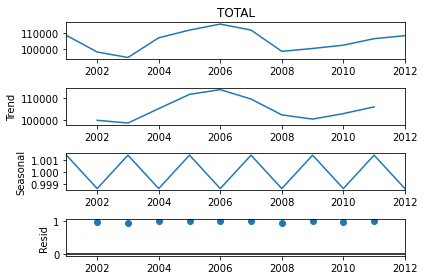

In [94]:
# Print the first five rows of the dataset
airline.head(5)

# ETS Decomposition
result = seasonal_decompose(airline['TOTAL'] , model ='multiplicative' , period=2)

r=result.plot()

In [95]:
# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['TOTAL'], start_p = 0, start_q = 0,
						max_p = 2, max_q = 2, m = 1,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=247.790, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=247.752, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=313.698, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=242.733, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.465 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -117.367
Date:                Mon, 22 Nov 2021   AIC                            242.733
Time:                        19:27:18   BIC                            244.673
Sample:                             0   HQIC                           242.015
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.466e+04   1.96e+04      4.824      0.000    5.62e+04    1.33e+05
ar.L1          0.7757      0.191      4.063      0.000       0.402       1.150
ar.L2         -0.6687      0.191     -3.494      0.000      -1.044      -0.294
sigma2      1.448e+07     19.293   7.51e+05      0.000    1.45e+07    1.45e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.97   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.16   Prob(JB):                         0.67
Heteroskedasticity (H):               0.42   Skew:                            -0.01
Prob(H) (two-sided):                  0.42   Kurtosis:                         1.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.79e+22. Standard errors may be unstable.
"""

In [104]:
# Split data into train / test sets
train = airline.iloc[:len(airline)-]
test = airline.iloc[len(airline)-3:] # set two year for testing

# Fit a SARIMAX(3, 0, 1)x(0,0,0,0) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['TOTAL'],
				order = (2, 0, 0),
				seasonal_order =(0, 0, 0, 0))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  TOTAL   No. Observations:                    9
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -96.117
Date:                Mon, 22 Nov 2021   AIC                            198.234
Time:                        19:31:28   BIC                            198.825
Sample:                    01-01-2001   HQIC                           196.957
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1705      0.758      1.543      0.123      -0.316       2.657
ar.L2         -0.1738      0.740     -0.235      0.814      -1.624       1.276
sigma2      6.184e+07    4.1e-09   1.51e+16      0.000    6.18e+07    6.18e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.36
Prob(Q):                              0.76   Prob(JB):                         0.84
Heteroskedasticity (H):               1.14   Skew:                            -0.17
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.47e+33. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='YEAR'>

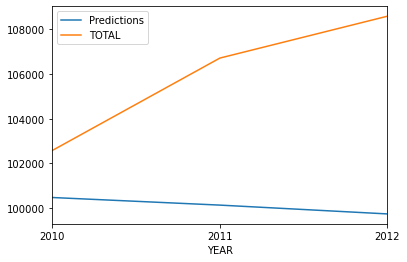

In [105]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
							typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['TOTAL'].plot(legend = True)
#predictions
#test['TOTAL']